In [21]:
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [23]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'dataset\Very_Mild_Demented\*')
mild = glob(r'dataset\Mild_Demented\*')
moderate = glob(r'dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'dataset\Non_Demented\*')

dataset\Non_Demented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

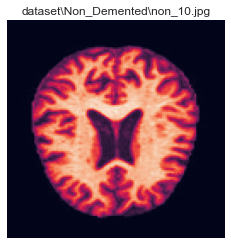

In [24]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

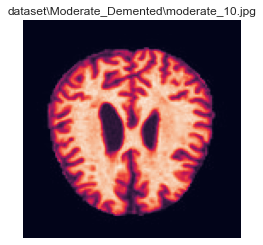

In [25]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

In [26]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

### SVM for Alzheimer Detection

In [27]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)


In [28]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])


3200
3200
6400
[0 0 0 ... 0 0 0]


In [29]:
#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

In [30]:
#train SVM model
#from sklearn import svm
dclf = svm.SVC(kernel = 'linear')
dclf.fit(train_x, train_y)
#store predictions and ground truth
# y_pred = dclf.predict(train_x)
# y_true = train_y
# y_true
# #assess the performance of the SVM with linear kernel on Training data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

# #Now, use the SVM model to predict Test data
# y_pred = dclf.predict(test_x)
# y_true = test_y

# #assess the performance of the SVM with linear kernel on Testing data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean

SVC(kernel='linear')

In [31]:
### Alzheimer Classifier

In [32]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y
y_true



Accuracy :  1.0


[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 3,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 3,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,


In [33]:
#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Accuracy :  0.98515625


In [34]:
pickle.dump(clf, open('Alzheimer.pkl', 'wb'))

<IPython.core.display.Javascript object>